In [1]:
import dLux as dl
import dLux.utils as dlu
import jax.random as jr
import jax.numpy as np
import matplotlib.pyplot as plt
import numpyro as npy
import numpyro.distributions as dist
from jax import device_count

In [2]:
wf_npix = 512
diameter = 0.125
coords = dlu.pixel_coords(wf_npix, diameter)
aperture = dlu.circle(coords, 0.5*diameter)

psf_npix = 64
psf_pixel_scale = 0.375 #arcsec
oversample = 2 #fairly shite.. hopefully doesn't come back to bite us

layers = [
    (
        'aperture',
        dl.layers.TransmissiveLayer(aperture, normalise=True)
    )
]

optics = dl.AngularOpticalSystem(
    wf_npix, diameter, layers, psf_npix, psf_pixel_scale, oversample
)

wavelength = 585e-9

fluxes = np.logspace(2, 6, 5)
print(fluxes)
# for some reason, for fluxes above 1 million (i.e. 10^7 and greater), seems to break

num_trials = 10 # 10 just takes so long.. only if oversample is high.

# numpyro stuff
parameters = ['wavelengths']

def psf_model(data, model, flux):
    
    values = [
        npy.sample("wavelength",    dist.Uniform(wavelength*(1-0.02*np.sqrt(1000)/np.sqrt(flux)), wavelength*(1+0.02*np.sqrt(1000)/np.sqrt(flux))))
    ]
    # made the distribution scale with 1 / sqrt flux so that it's well behaved.

    with npy.plate("data", len(data.flatten())):
        poisson_model = dist.Poisson(
            model.set(parameters, values).model().flatten()
        )
        return npy.sample("psf", poisson_model, obs=data.flatten())
    
sampler = npy.infer.MCMC(
    npy.infer.NUTS(psf_model),
    num_warmup=200,
    num_samples=200,
    num_chains=device_count(),
    progress_bar=True,
)

#rmax and cramer rao bound functions
def rmax(psf_pixel_scale, psf_npix):
    rmax = np.sqrt(2)*dlu.arcsec2rad(psf_npix * psf_pixel_scale/2) # divide by 2 for radius, sqrt2 because more pixels along the diagonal.
    return rmax

our_rmax = rmax(psf_pixel_scale, psf_npix)

def crb(wavelength, flux, diameter, rmax):
    crb = (wavelength**(3/2)/(2*(flux*(2*diameter*rmax - wavelength))**0.5)) * (10**9) # gonna convert to nm here too!
    return crb

[1.e+02 1.e+03 1.e+04 1.e+05 1.e+06]


sample: 100%|██████████| 400/400 [00:10<00:00, 36.84it/s, 3 steps of size 1.14e+00. acc. prob=0.92] 


CPU times: user 47.2 s, sys: 1.72 s, total: 49 s
Wall time: 15.2 s


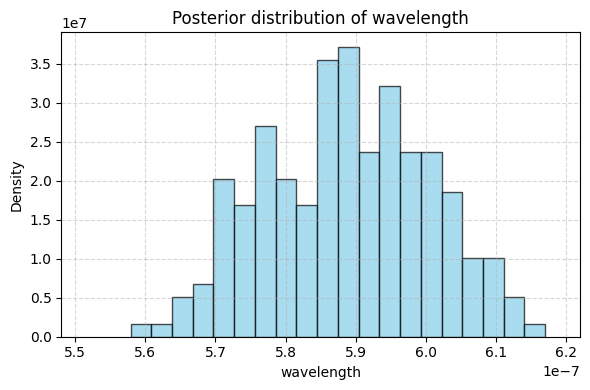

sample: 100%|██████████| 400/400 [00:10<00:00, 38.28it/s, 1 steps of size 9.21e-01. acc. prob=0.92] 

CPU times: user 41.2 s, sys: 1.5 s, total: 42.7 s
Wall time: 10.5 s


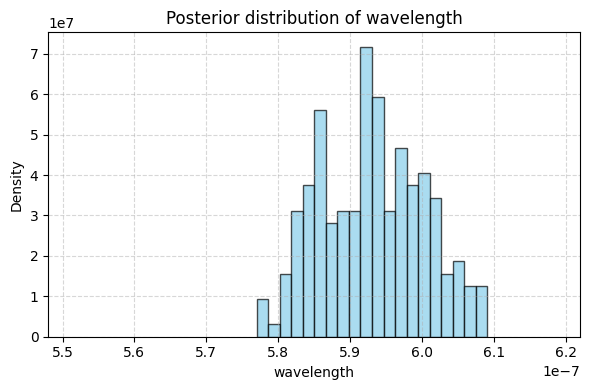

sample: 100%|██████████| 400/400 [00:11<00:00, 34.17it/s, 1 steps of size 1.21e+00. acc. prob=0.92]


CPU times: user 47.4 s, sys: 1.64 s, total: 49 s
Wall time: 11.8 s


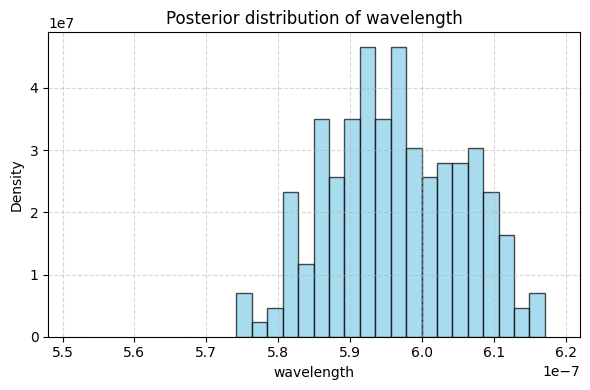

sample: 100%|██████████| 400/400 [00:13<00:00, 29.72it/s, 1 steps of size 8.42e-01. acc. prob=0.92] 


CPU times: user 55.7 s, sys: 1.61 s, total: 57.3 s
Wall time: 13.5 s


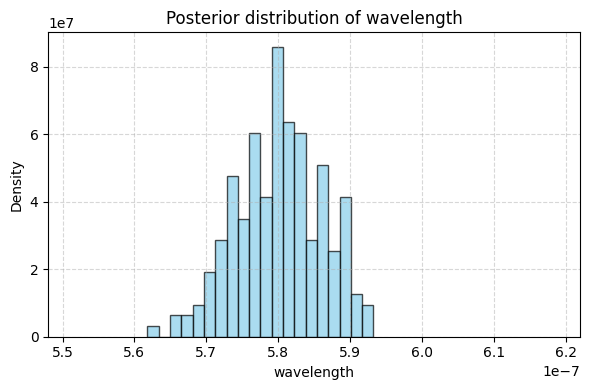

sample: 100%|██████████| 400/400 [00:11<00:00, 36.00it/s, 1 steps of size 5.31e-01. acc. prob=0.93]

CPU times: user 44.7 s, sys: 1.39 s, total: 46.1 s
Wall time: 11.2 s


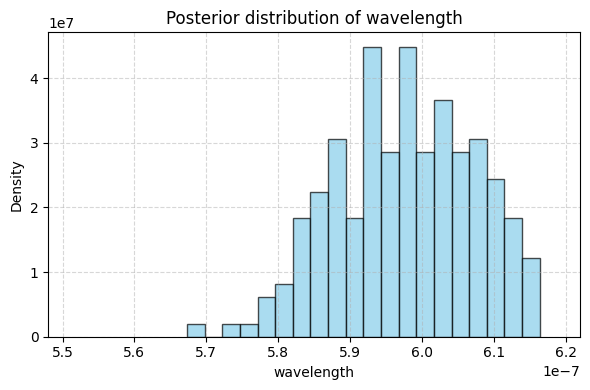

sample: 100%|██████████| 400/400 [00:11<00:00, 35.68it/s, 1 steps of size 8.95e-01. acc. prob=0.92] 


CPU times: user 46.4 s, sys: 1.47 s, total: 47.9 s
Wall time: 11.3 s


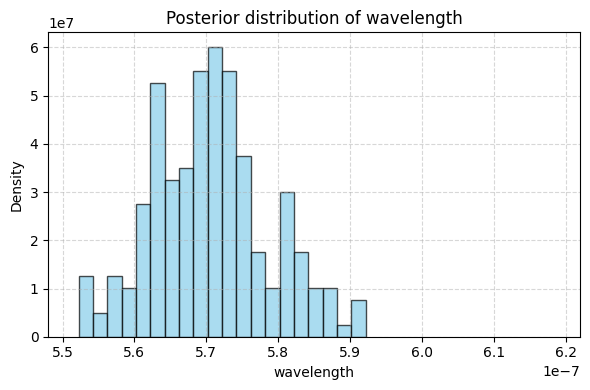

sample: 100%|██████████| 400/400 [00:11<00:00, 36.25it/s, 1 steps of size 7.89e-01. acc. prob=0.92]

CPU times: user 46 s, sys: 1.3 s, total: 47.3 s
Wall time: 11.1 s


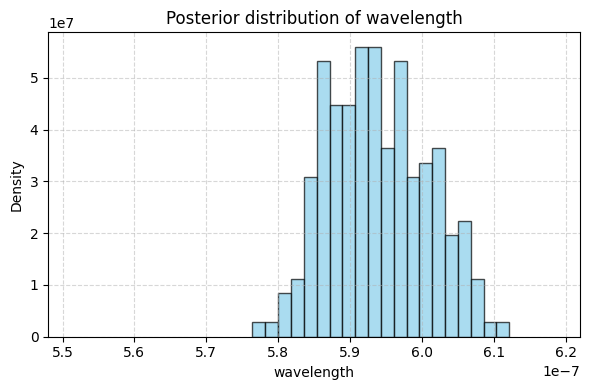

sample: 100%|██████████| 400/400 [00:11<00:00, 35.45it/s, 1 steps of size 9.31e-01. acc. prob=0.92] 

CPU times: user 47.4 s, sys: 1.37 s, total: 48.8 s
Wall time: 11.4 s


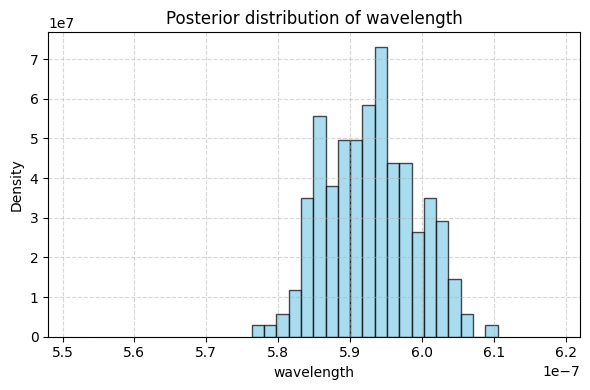

sample: 100%|██████████| 400/400 [00:11<00:00, 35.46it/s, 1 steps of size 1.02e+00. acc. prob=0.94]

CPU times: user 48 s, sys: 1.25 s, total: 49.3 s
Wall time: 11.4 s


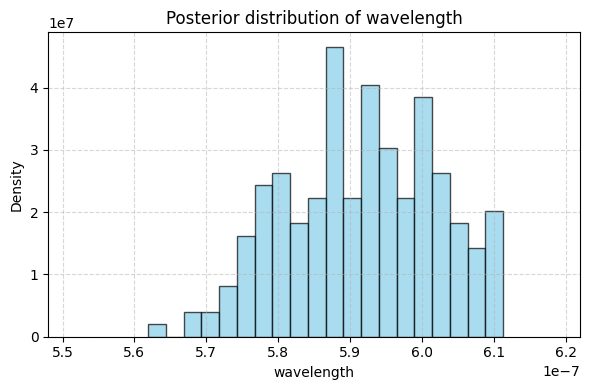

sample: 100%|██████████| 400/400 [00:12<00:00, 31.75it/s, 3 steps of size 8.45e-01. acc. prob=0.94] 


CPU times: user 52.2 s, sys: 1.46 s, total: 53.7 s
Wall time: 12.7 s


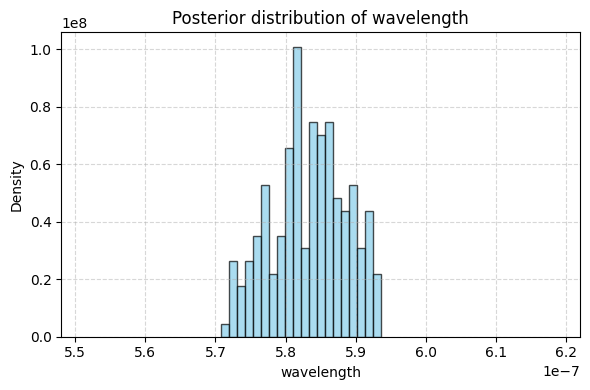

sample: 100%|██████████| 400/400 [00:11<00:00, 35.35it/s, 3 steps of size 1.04e+00. acc. prob=0.94]


CPU times: user 48.5 s, sys: 1.25 s, total: 49.7 s
Wall time: 11.4 s


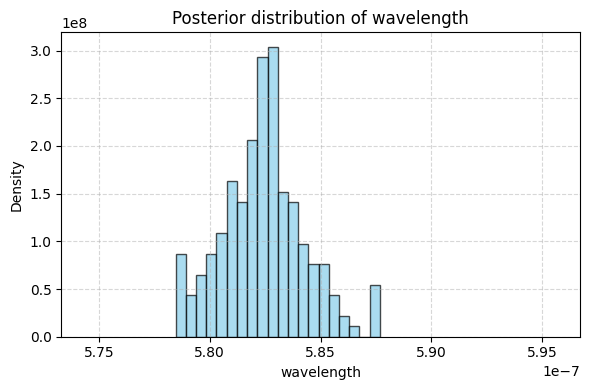

sample: 100%|██████████| 400/400 [00:10<00:00, 36.65it/s, 1 steps of size 1.30e+00. acc. prob=0.93] 


CPU times: user 47 s, sys: 1.19 s, total: 48.2 s
Wall time: 11 s


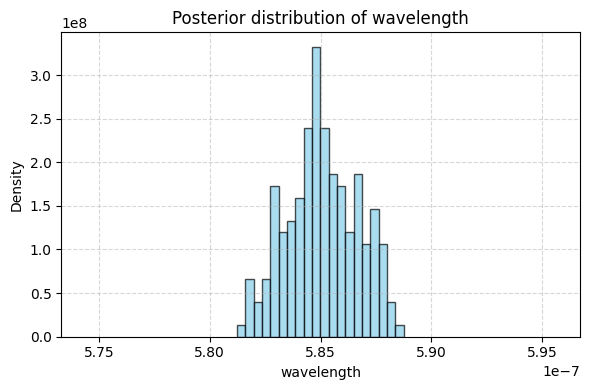

sample: 100%|██████████| 400/400 [00:11<00:00, 34.01it/s, 1 steps of size 7.90e-01. acc. prob=0.94] 

CPU times: user 50.5 s, sys: 1.29 s, total: 51.8 s
Wall time: 11.8 s


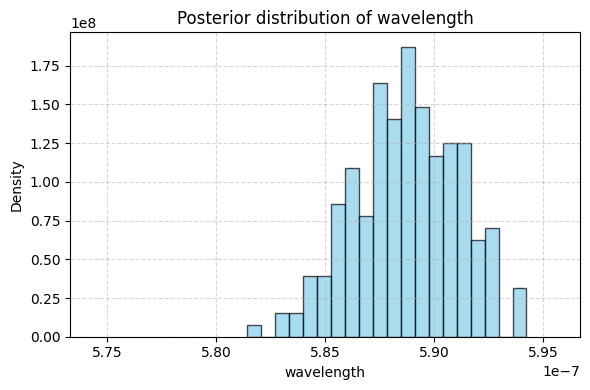

sample: 100%|██████████| 400/400 [00:10<00:00, 36.78it/s, 1 steps of size 8.93e-01. acc. prob=0.93] 


CPU times: user 46.4 s, sys: 1.23 s, total: 47.7 s
Wall time: 11 s


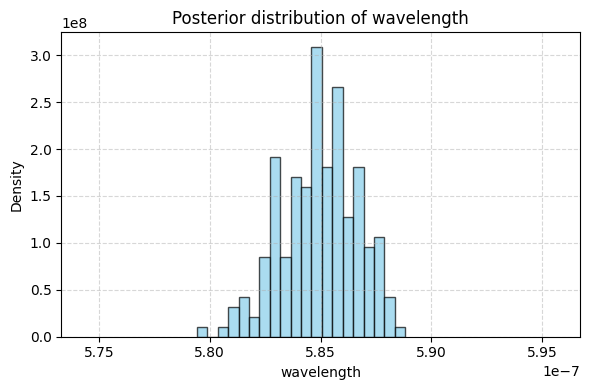

sample: 100%|██████████| 400/400 [00:10<00:00, 38.00it/s, 1 steps of size 1.25e+00. acc. prob=0.92] 


CPU times: user 45.3 s, sys: 1.15 s, total: 46.4 s
Wall time: 10.6 s


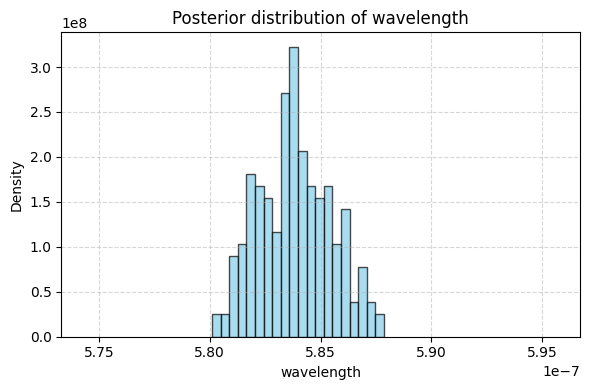

sample: 100%|██████████| 400/400 [00:11<00:00, 34.31it/s, 1 steps of size 1.11e+00. acc. prob=0.94] 

CPU times: user 50.5 s, sys: 1.23 s, total: 51.7 s
Wall time: 11.7 s


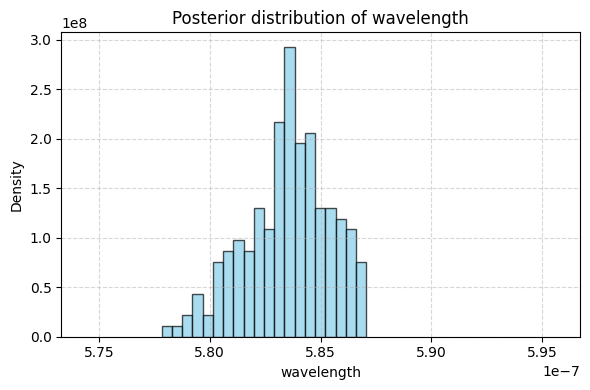

sample: 100%|██████████| 400/400 [00:10<00:00, 39.17it/s, 3 steps of size 9.98e-01. acc. prob=0.90] 


CPU times: user 43.3 s, sys: 1.22 s, total: 44.5 s
Wall time: 10.3 s


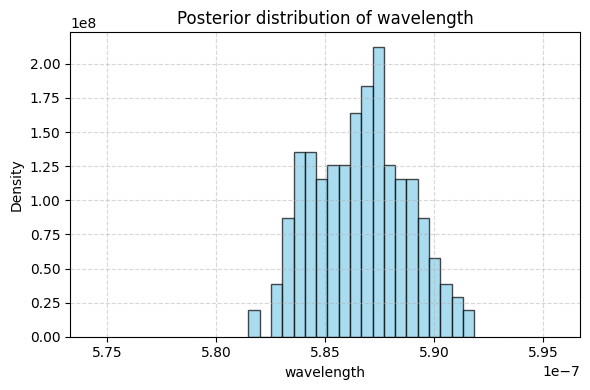

sample: 100%|██████████| 400/400 [00:10<00:00, 37.53it/s, 1 steps of size 1.06e+00. acc. prob=0.92] 

CPU times: user 45.6 s, sys: 1.2 s, total: 46.8 s
Wall time: 10.7 s


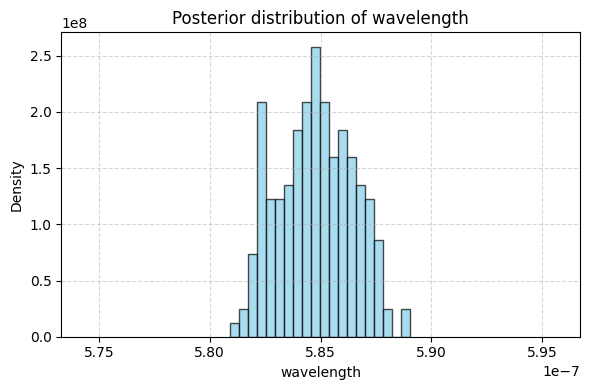

sample: 100%|██████████| 400/400 [00:10<00:00, 38.21it/s, 1 steps of size 8.60e-01. acc. prob=0.93]

CPU times: user 45 s, sys: 1.2 s, total: 46.2 s
Wall time: 10.5 s


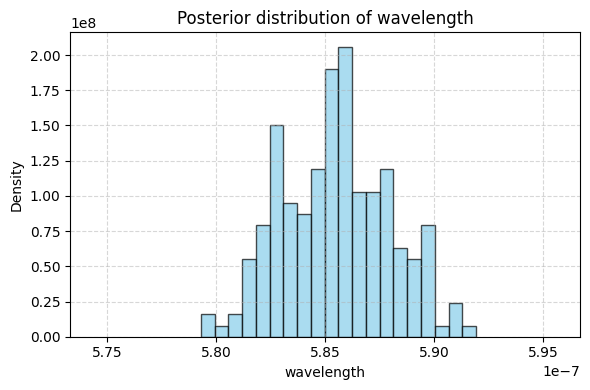

sample: 100%|██████████| 400/400 [00:10<00:00, 37.18it/s, 1 steps of size 8.00e-01. acc. prob=0.93] 


CPU times: user 46.4 s, sys: 1.21 s, total: 47.6 s
Wall time: 10.9 s


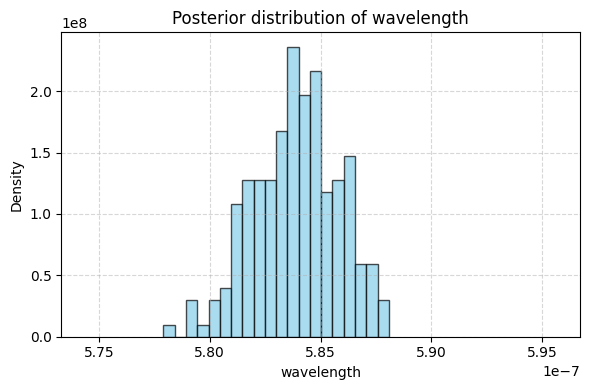

sample: 100%|██████████| 400/400 [00:10<00:00, 36.59it/s, 1 steps of size 1.33e+00. acc. prob=0.93] 


CPU times: user 46.6 s, sys: 1.22 s, total: 47.9 s
Wall time: 11 s


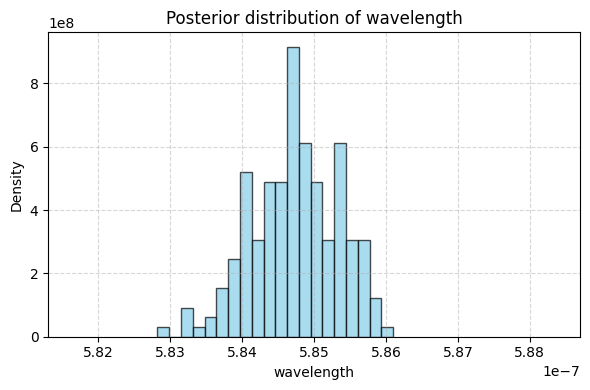

sample: 100%|██████████| 400/400 [00:11<00:00, 34.58it/s, 1 steps of size 9.31e-01. acc. prob=0.92] 

CPU times: user 49.3 s, sys: 1.45 s, total: 50.7 s
Wall time: 11.6 s


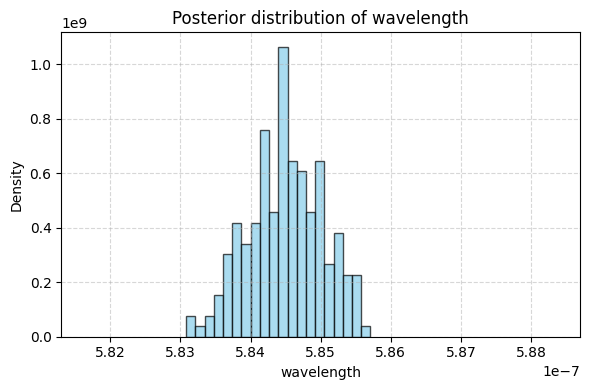

sample: 100%|██████████| 400/400 [00:10<00:00, 37.09it/s, 1 steps of size 1.44e+00. acc. prob=0.92]

CPU times: user 45.8 s, sys: 1.32 s, total: 47.1 s
Wall time: 10.9 s


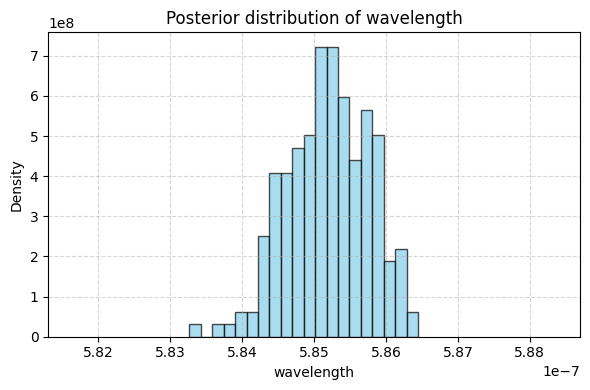

sample: 100%|██████████| 400/400 [00:11<00:00, 34.47it/s, 1 steps of size 1.01e+00. acc. prob=0.94] 


CPU times: user 49.9 s, sys: 1.46 s, total: 51.3 s
Wall time: 11.7 s


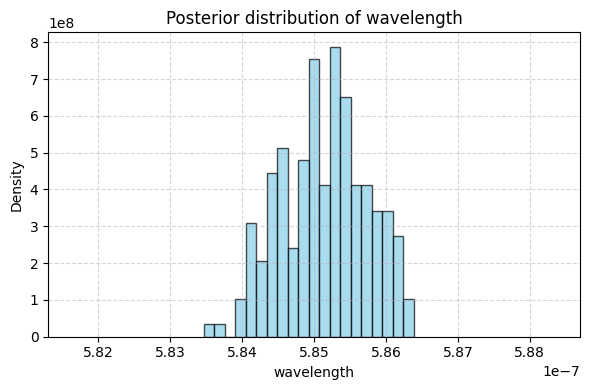

sample: 100%|██████████| 400/400 [00:12<00:00, 32.44it/s, 7 steps of size 1.18e+00. acc. prob=0.94] 


CPU times: user 53.2 s, sys: 1.42 s, total: 54.6 s
Wall time: 12.4 s


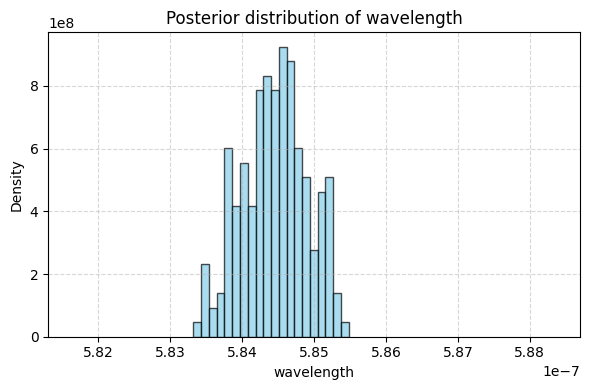

sample: 100%|██████████| 400/400 [00:11<00:00, 35.31it/s, 1 steps of size 9.45e-01. acc. prob=0.94] 

CPU times: user 48.4 s, sys: 1.28 s, total: 49.7 s
Wall time: 11.4 s


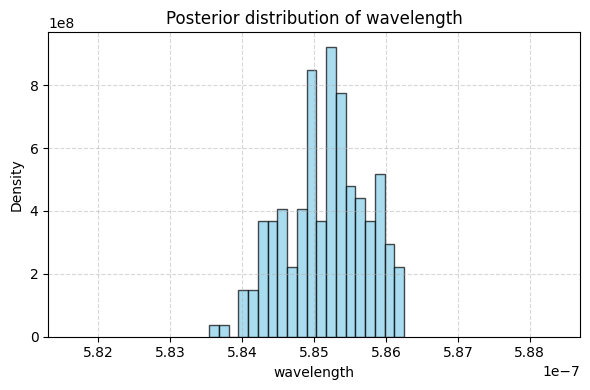

sample: 100%|██████████| 400/400 [00:10<00:00, 37.12it/s, 1 steps of size 9.30e-01. acc. prob=0.93]


CPU times: user 46.2 s, sys: 1.15 s, total: 47.3 s
Wall time: 10.9 s


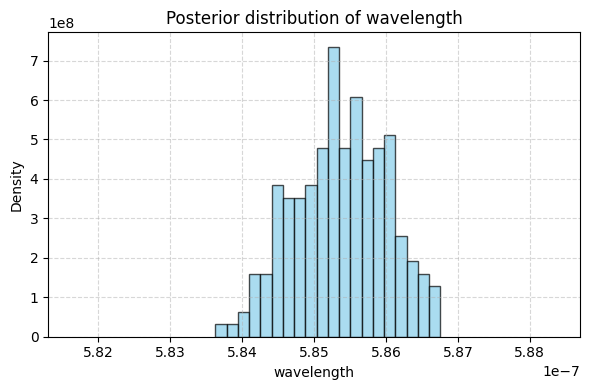

sample: 100%|██████████| 400/400 [00:10<00:00, 37.29it/s, 1 steps of size 1.22e+00. acc. prob=0.93] 

CPU times: user 45.9 s, sys: 1.19 s, total: 47.1 s
Wall time: 10.8 s


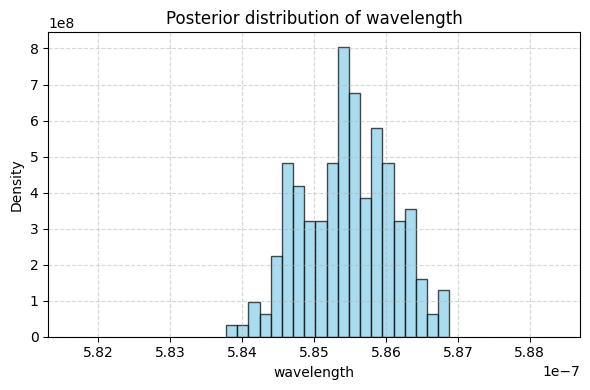

sample: 100%|██████████| 400/400 [00:11<00:00, 34.98it/s, 1 steps of size 8.35e-01. acc. prob=0.93] 


CPU times: user 48.9 s, sys: 1.25 s, total: 50.1 s
Wall time: 11.6 s


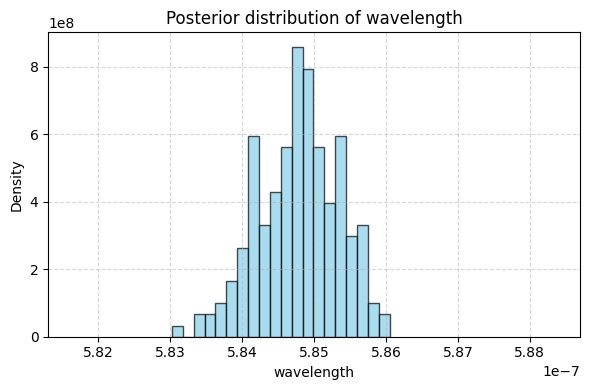

sample: 100%|██████████| 400/400 [00:12<00:00, 32.83it/s, 1 steps of size 7.87e-01. acc. prob=0.93] 


CPU times: user 52.9 s, sys: 1.35 s, total: 54.2 s
Wall time: 12.3 s


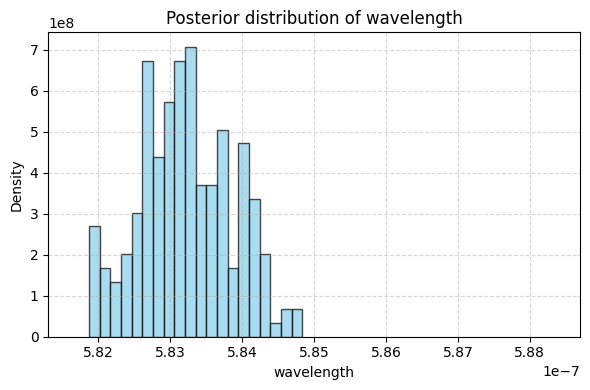

sample: 100%|██████████| 400/400 [00:11<00:00, 34.70it/s, 1 steps of size 8.80e-01. acc. prob=0.94] 


CPU times: user 49.1 s, sys: 1.29 s, total: 50.4 s
Wall time: 11.6 s


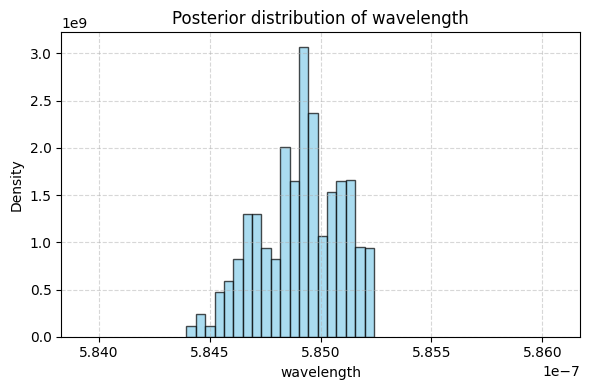

sample: 100%|██████████| 400/400 [00:12<00:00, 32.95it/s, 3 steps of size 1.13e+00. acc. prob=0.94] 


CPU times: user 52 s, sys: 1.41 s, total: 53.4 s
Wall time: 12.2 s


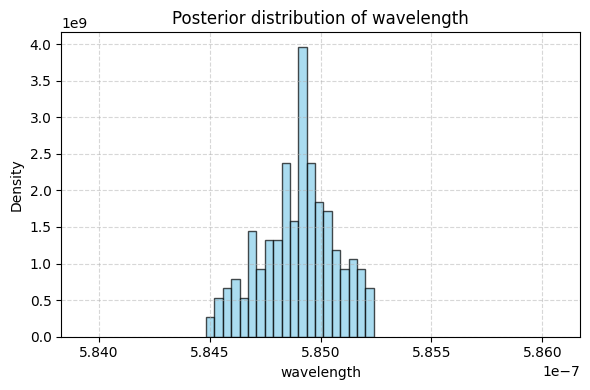

sample: 100%|██████████| 400/400 [00:11<00:00, 35.04it/s, 1 steps of size 1.03e+00. acc. prob=0.94] 

CPU times: user 49 s, sys: 1.22 s, total: 50.2 s
Wall time: 11.5 s


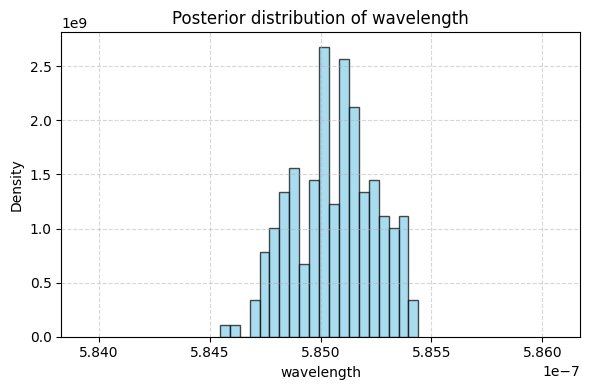

sample: 100%|██████████| 400/400 [00:11<00:00, 34.34it/s, 1 steps of size 1.16e+00. acc. prob=0.94] 

CPU times: user 49.5 s, sys: 1.34 s, total: 50.8 s
Wall time: 11.7 s


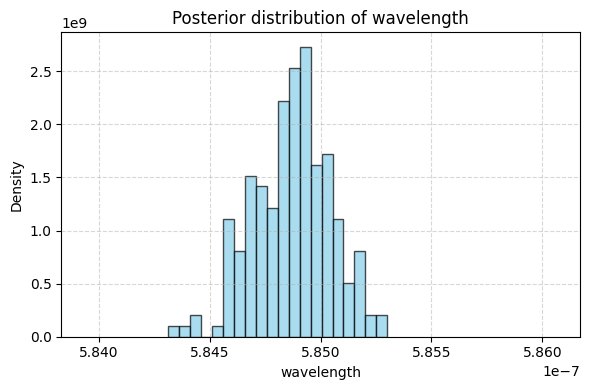

sample: 100%|██████████| 400/400 [00:12<00:00, 33.17it/s, 1 steps of size 1.24e+00. acc. prob=0.92] 

CPU times: user 51.9 s, sys: 1.28 s, total: 53.2 s
Wall time: 12.1 s


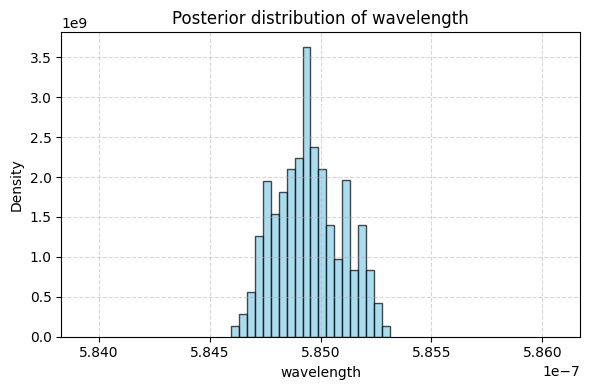

sample: 100%|██████████| 400/400 [00:11<00:00, 33.40it/s, 1 steps of size 9.98e-01. acc. prob=0.93] 

CPU times: user 50.7 s, sys: 1.43 s, total: 52.1 s
Wall time: 12.1 s


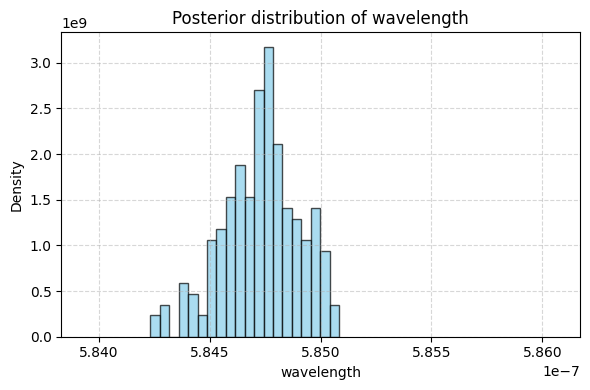

sample: 100%|██████████| 400/400 [00:11<00:00, 35.74it/s, 1 steps of size 9.30e-01. acc. prob=0.93] 

CPU times: user 47.4 s, sys: 1.14 s, total: 48.5 s
Wall time: 11.3 s


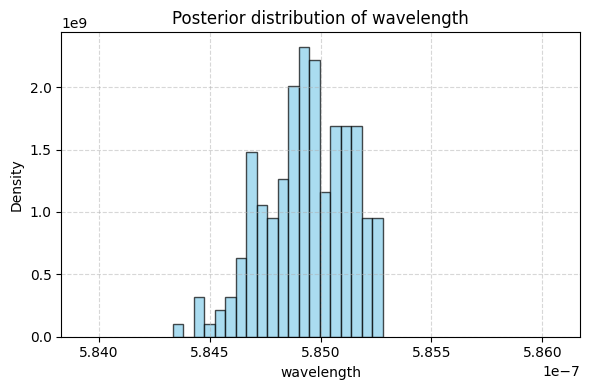

sample: 100%|██████████| 400/400 [00:10<00:00, 37.11it/s, 1 steps of size 9.68e-01. acc. prob=0.93]

CPU times: user 46.1 s, sys: 1.26 s, total: 47.4 s
Wall time: 10.9 s


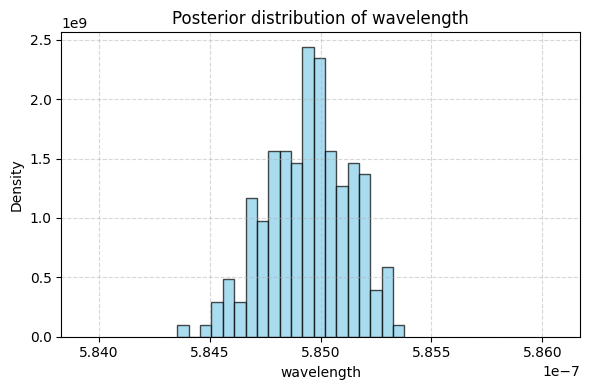

sample: 100%|██████████| 400/400 [00:11<00:00, 34.79it/s, 1 steps of size 9.91e-01. acc. prob=0.94] 


CPU times: user 48.9 s, sys: 1.41 s, total: 50.4 s
Wall time: 11.6 s


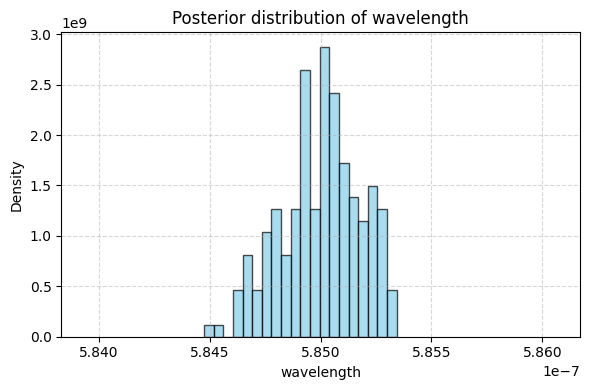

sample: 100%|██████████| 400/400 [00:12<00:00, 32.71it/s, 3 steps of size 8.67e-01. acc. prob=0.94]

CPU times: user 52.3 s, sys: 1.52 s, total: 53.8 s
Wall time: 12.3 s


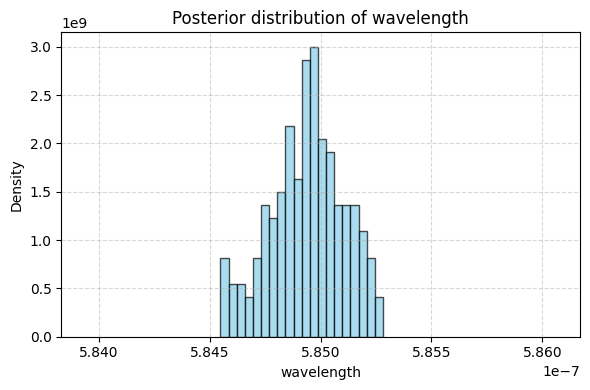

sample: 100%|██████████| 400/400 [00:12<00:00, 32.90it/s, 3 steps of size 9.33e-01. acc. prob=0.93] 


CPU times: user 52.1 s, sys: 1.44 s, total: 53.5 s
Wall time: 12.2 s


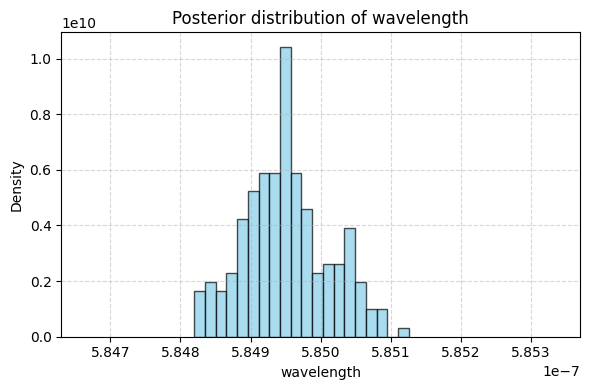

sample: 100%|██████████| 400/400 [00:12<00:00, 33.15it/s, 3 steps of size 7.50e-01. acc. prob=0.93]


CPU times: user 51.6 s, sys: 1.45 s, total: 53.1 s
Wall time: 12.2 s


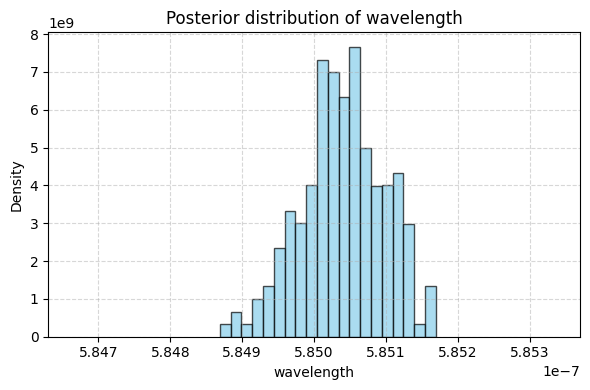

sample: 100%|██████████| 400/400 [00:10<00:00, 36.76it/s, 1 steps of size 9.16e-01. acc. prob=0.92] 


CPU times: user 46.6 s, sys: 1.3 s, total: 47.9 s
Wall time: 11 s


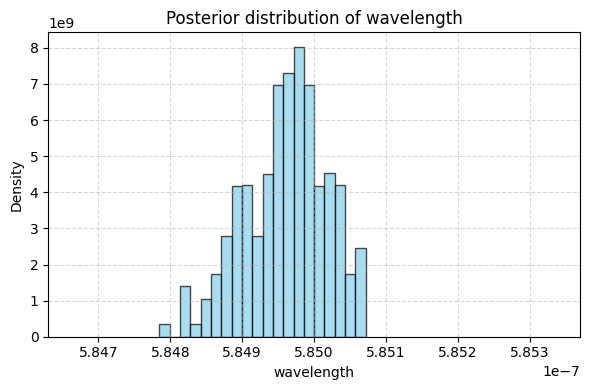

sample: 100%|██████████| 400/400 [00:10<00:00, 37.91it/s, 1 steps of size 1.10e+00. acc. prob=0.90] 


CPU times: user 45.2 s, sys: 1.21 s, total: 46.4 s
Wall time: 10.7 s


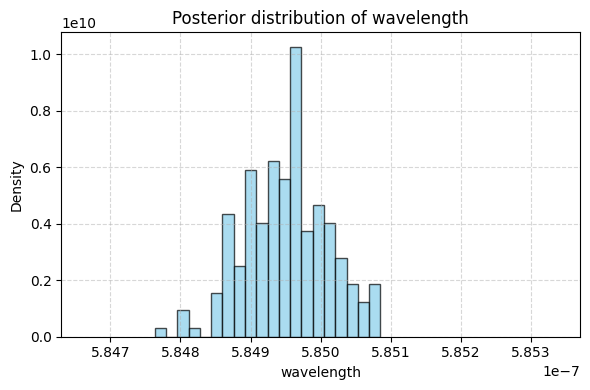

sample: 100%|██████████| 400/400 [00:12<00:00, 33.06it/s, 3 steps of size 9.64e-01. acc. prob=0.93]


CPU times: user 51.6 s, sys: 1.37 s, total: 52.9 s
Wall time: 12.2 s


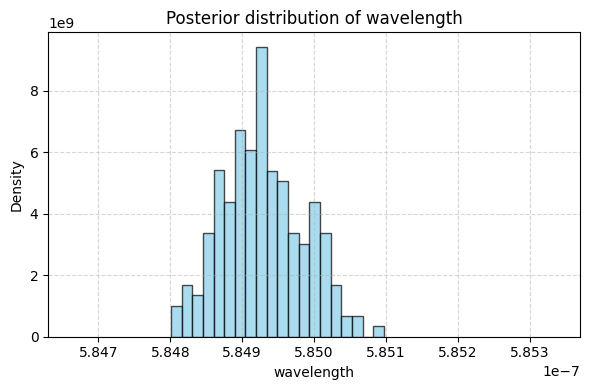

sample: 100%|██████████| 400/400 [00:11<00:00, 34.09it/s, 3 steps of size 1.05e+00. acc. prob=0.92] 


CPU times: user 50.1 s, sys: 1.33 s, total: 51.4 s
Wall time: 11.8 s


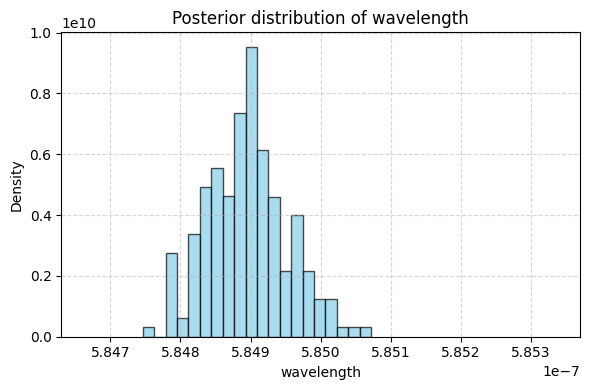

sample: 100%|██████████| 400/400 [00:11<00:00, 34.12it/s, 3 steps of size 8.52e-01. acc. prob=0.93]


CPU times: user 50.1 s, sys: 1.36 s, total: 51.5 s
Wall time: 11.8 s


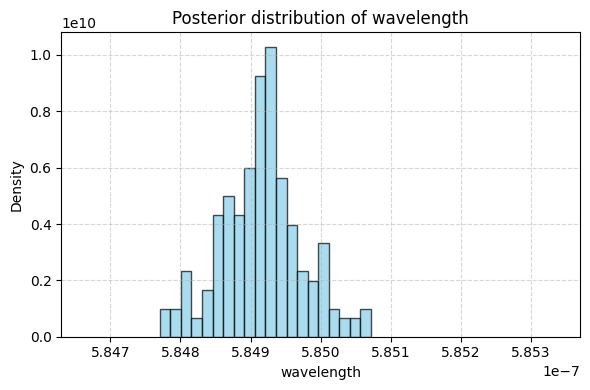

sample: 100%|██████████| 400/400 [00:12<00:00, 32.73it/s, 1 steps of size 1.11e+00. acc. prob=0.92] 


CPU times: user 51.8 s, sys: 1.48 s, total: 53.3 s
Wall time: 12.3 s


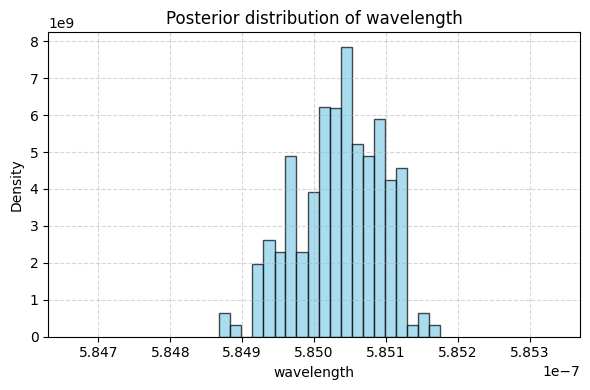

sample: 100%|██████████| 400/400 [00:11<00:00, 34.61it/s, 1 steps of size 1.06e+00. acc. prob=0.92] 

CPU times: user 48.9 s, sys: 1.39 s, total: 50.3 s
Wall time: 11.6 s


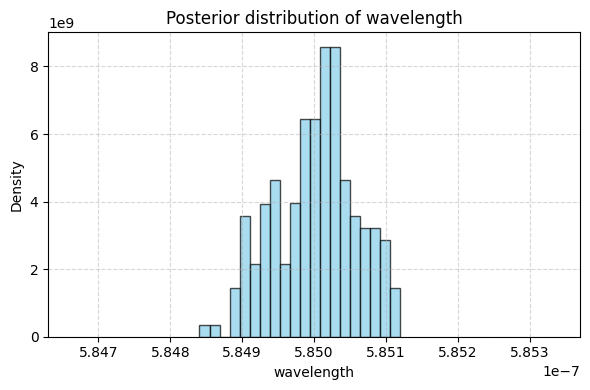

sample: 100%|██████████| 400/400 [00:11<00:00, 35.95it/s, 1 steps of size 1.02e+00. acc. prob=0.92]

CPU times: user 47.2 s, sys: 1.31 s, total: 48.5 s
Wall time: 11.2 s


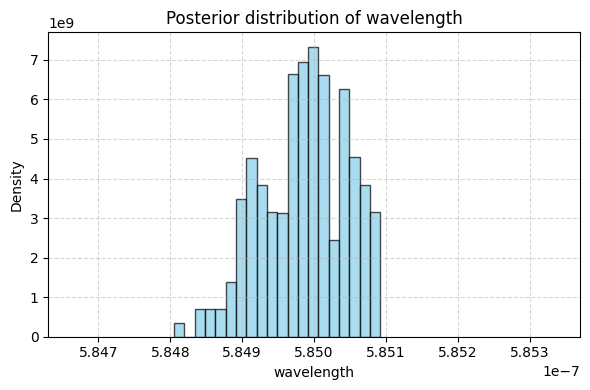

In [ ]:
square_errors_by_flux = []
cramer_rao_bounds = []

for flux in fluxes:
    source = dl.PointSource(np.array([wavelength]),flux = flux)
    telescope = dl.Telescope(optics, ('source', source))
    psf = telescope.model()

    flux_errors = []

    for i in np.arange(num_trials):
        key = jr.PRNGKey(i)
        data = jr.poisson(key, psf)

        %time sampler.run(jr.PRNGKey(0), data, telescope, flux)
        samples = sampler.get_samples()
        median = np.median(samples['wavelength'].flatten())

        # convert to nm here, otherwise we die later
        square_error = ((median - wavelength)*(10**9))**2
        flux_errors.append(square_error)

        # plot of distribution
        for param, values in samples.items():
            plt.figure(figsize=(6, 4))
            plt.hist(values.flatten(), bins=20, density=True, alpha=0.7, color='skyblue', edgecolor='black')
            plt.title(f"Posterior distribution of {param}")
            plt.xlabel(param)
            plt.ylabel("Density")
            plt.xlim((1-0.02*np.sqrt(1000)/np.sqrt(flux))*wavelength,(1+0.02*np.sqrt(1000)/np.sqrt(flux))*wavelength)
            plt.grid(True, linestyle='--', alpha=0.5)
            plt.tight_layout()
            plt.show()

    square_errors_by_flux.append(flux_errors)
    
    crb_flux = crb(wavelength, flux, diameter, our_rmax)
    cramer_rao_bounds.append(crb_flux)

In [4]:
variances = np.array([np.mean(np.array(errors)) for errors in square_errors_by_flux])
var_of_var = np.array([np.var(np.array(errors)) for errors in square_errors_by_flux])

# variance of MSE: have to divide by number of trials: want a measure of the error about the mean
var_of_mse = var_of_var / num_trials

#stderr_of_mse = np.sqrt(var_of_mse)

# then apply 'delta method' to get variance of RMSE (which what we're plotting, equiv to cramer rao)
rmse = np.sqrt(variances)
var_of_rmse = (1 / (2 * rmse))**2 * var_of_mse

stderr_of_rmse = np.sqrt(var_of_rmse)

In [ ]:
# just calculated toliman cramer bound, gonna include it here for comparison
def crb_toliman(wavelength, flux, diameter, period):
    crb_toliman = np.sqrt( (3 * np.pi * period**2 * wavelength**2) / (2 * flux * (3 * np.pi**3 * diameter**2 + period**2 * (9 * np.pi - 16) ) ) ) * (10**9) #convert to nm
    return crb_toliman

crbs_toliman = []
period = 304e-6
for flux in fluxes:
    crbs_toliman.append(crb_toliman(wavelength, flux, diameter, period))

crbs_toliman = np.array(crbs_toliman)
# beautiful, the toliman bounds are significantly lower than for a normal airy disk, as expected.
# all that's left to do is to verify it... would be so hype if it worked.
# if it doesn't work... oh well we tried.

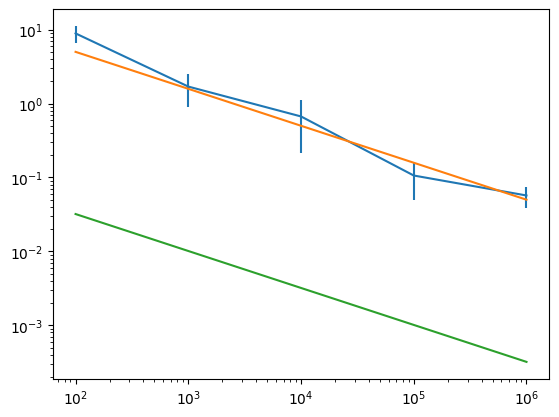

In [10]:
#plt.loglog(fluxes, cramer_rao_bounds)
plt.errorbar(fluxes, rmse, yerr=stderr_of_rmse*2)
plt.errorbar(fluxes,cramer_rao_bounds)
plt.errorbar(fluxes,crbs_toliman)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [6]:
print(cramer_rao_bounds)

[Array(5.0045346e-09, dtype=float32), Array(1.5825727e-09, dtype=float32), Array(5.0045346e-10, dtype=float32), Array(1.5825727e-10, dtype=float32), Array(5.004534e-11, dtype=float32)]


In [23]:
print(np.sqrt(variances))

[8.690434e-09]


In [15]:
print(square_errors_by_flux)
print(np.sqrt(variances[0]))
print(cramer_rao_bounds[0])
print(crb(wavelength,100,diameter,dlu.arcsec2rad(psf_npix * psf_pixel_scale/2)))

[[Array(5.575354e-18, dtype=float32), Array(5.599671e-17, dtype=float32), Array(1.0625808e-16, dtype=float32), Array(1.918999e-17, dtype=float32), Array(1.6916938e-16, dtype=float32), Array(2.0231206e-16, dtype=float32), Array(8.85016e-17, dtype=float32), Array(5.1579426e-17, dtype=float32), Array(5.1434193e-17, dtype=float32), Array(5.2196288e-18, dtype=float32)]]
8.690434e-09
5.0045346e-09
5.987841076459987e-09


In [21]:
print(np.sqrt(np.array(variances)))

[8.690434e-09]


In [14]:
sampler.print_summary()


                  mean       std    median      5.0%     95.0%     n_eff     r_hat
  wavelength      0.00      0.00      0.00      0.00      0.00     87.68      1.03

Number of divergences: 0


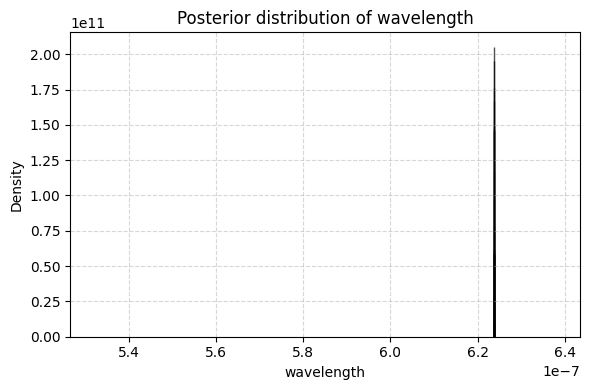

In [12]:
for param, values in samples.items():
    plt.figure(figsize=(6, 4))
    plt.hist(values.flatten(), bins=20, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(f"Posterior distribution of {param}")
    plt.xlabel(param)
    plt.ylabel("Density")
    plt.xlim(0.9*wavelength,1.1*wavelength)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [11]:
print(np.median(values))

6.238132e-07
